In [1]:
# from ..coralshift.utils import directories
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
from functools import reduce
import numpy as np

import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [2]:
# def check_files_in_list_exist(file_list: Union[List[str], List[Path]]):
#     """State which files don't exist and remove from list"""
#     files_found = []
#     for fl in file_list:
#         # attempt conversion to Path object if necessary
#         if type(fl) != Path:
#             try:
#                 fl = Path(fl)
#             except TypeError:
#                 print(f'{fl} could not be converted to Path object')

#         if fl.is_file():
#             files_found += fl,
#         else:
#             print(f'{fl} not found. Removing from list.')

#     return files_found



# def read_and_merge_pkls(
#     pkl_paths: Union[List[str], List[Path]]
# ) -> pd.DataFrame:
#     """Read in pkl files from list of file paths and merge on index"""
#     # check all files exist
#     pkl_paths_present = check_files_in_list_exist(pkl_paths)
#     df_list = [pd.read_pickle(pkl) for pkl in pkl_paths_present]

#     return reduce(lambda df1,df2: pd.merge(df1,df2,left_index=True,right_index=True), df_list)


def merge_dfs(
    df_list: list[pd.DataFrame]
) -> pd.DataFrame:
    """Merge pd.DataFrames into single pd.DataFrame. HOW."""
    return reduce(lambda df1, df2: pd.merge(df1, df2, left_index=True, right_index=True), df_list)

In [3]:
baseline_datasets_data_dir = Path('/Users/orlandotimmerman/Library/CloudStorage/OneDrive-UniversityofCambridge/cambridge/mres/mres_project/coralshift/datasets/reef_baseline/RR_contemporary/tabular-data')
df_list = []
for area_file in baseline_datasets_data_dir.rglob("seaviewsurvey_reefcover_*.csv"):
	# read file and save as pkl to correct folder, with standardised formatting (e.g. save 'lng' as 'lon', speci)
	df_list.append(pd.read_csv(area_file))

In [4]:
baseline_datasets_data_dir

PosixPath('/Users/orlandotimmerman/Library/CloudStorage/OneDrive-UniversityofCambridge/cambridge/mres/mres_project/coralshift/datasets/reef_baseline/RR_contemporary/tabular-data')

In [5]:
all_reef_areas = pd.concat(df_list)


In [6]:
(df_list[0].columns)

Index(['surveyid', 'imageid', 'quadratid', 'lat', 'lng', 'AARC', 'ACER',
       'ACOM', 'Acra', 'AFIS', 'AGAR', 'AMAT', 'APAL', 'ApFuCa', 'ATUB', 'CCA',
       'CDEL', 'CNAT', 'CPLI', 'CVAG', 'CVIR', 'CYAN', 'Dict', 'DLAB',
       'DLAB-BL', 'EFAS', 'ENGR1', 'ENSP', 'ERGR', 'ERHD', 'ERSP', 'FISH',
       'Gnep', 'GORG', 'Hali', 'IRCI', 'Lvar', 'MADR', 'MCAV', 'MEA-HC',
       'MEAN', 'Mille', 'Mille-BL', 'MLAG', 'MOB-INV', 'MSE-HC', 'MTUN',
       'Ndig', 'OCOM', 'OCOM-BL', 'OTH-SINV', 'PASTR', 'PLAK', 'PPOR', 'PSEU',
       'PSEU-BL', 'ROSP', 'Sand', 'SCplu', 'Seagrass', 'Sediment', 'SpMass',
       'Sponge', 'SPvase', 'SSID', 'Turf', 'Turfsa', 'Unc', 'UTEN', 'XMUT',
       'ZOAN'],
      dtype='object')

In [7]:
all_reef_areas.columns

Index(['surveyid', 'imageid', 'quadratid', 'lat', 'lng', 'AARC', 'ACER',
       'ACOM', 'Acra', 'AFIS',
       ...
       'SINV_SPO_F', 'SINV_SPO_V', 'SINV_TUN', 'TFP_RDG_Al', 'TFP_RND_Al',
       'TFP_SMO_Po', 'TSH', 'SGRASS', 'SINV_SPO_C', 'Trans'],
      dtype='object', length=172)

In [8]:
# # data_path = Path('/Users/orlandotimmerman/Library/CloudStorage/OneDrive-UniversityofCambridge/cambridge/mres/mres_project/coralshift/datasets/reef_baseline/tabular-data/seaviewsurvey_annotations.csv')

# # load in csv files with names seaviewsurvey_reefcover_AREA
# # plot lat/lon points as particular colour for area (potentially conusing cartopy)
# atlantic_data_path = Path(''/Users/orlandotimmerman/Library/CloudStorage/OneDrive-UniversityofCambridge/cambridge/mres/mres_project/coralshift/datasets/reef_baseline/tabular-data/seaviewsurvey_reefcover_atlantic.csv'')
# atlantic_data = pd.read_csv(atlantic_data_path)
# atlantic_data.head()

In [9]:
len(all_reef_areas)

1082324

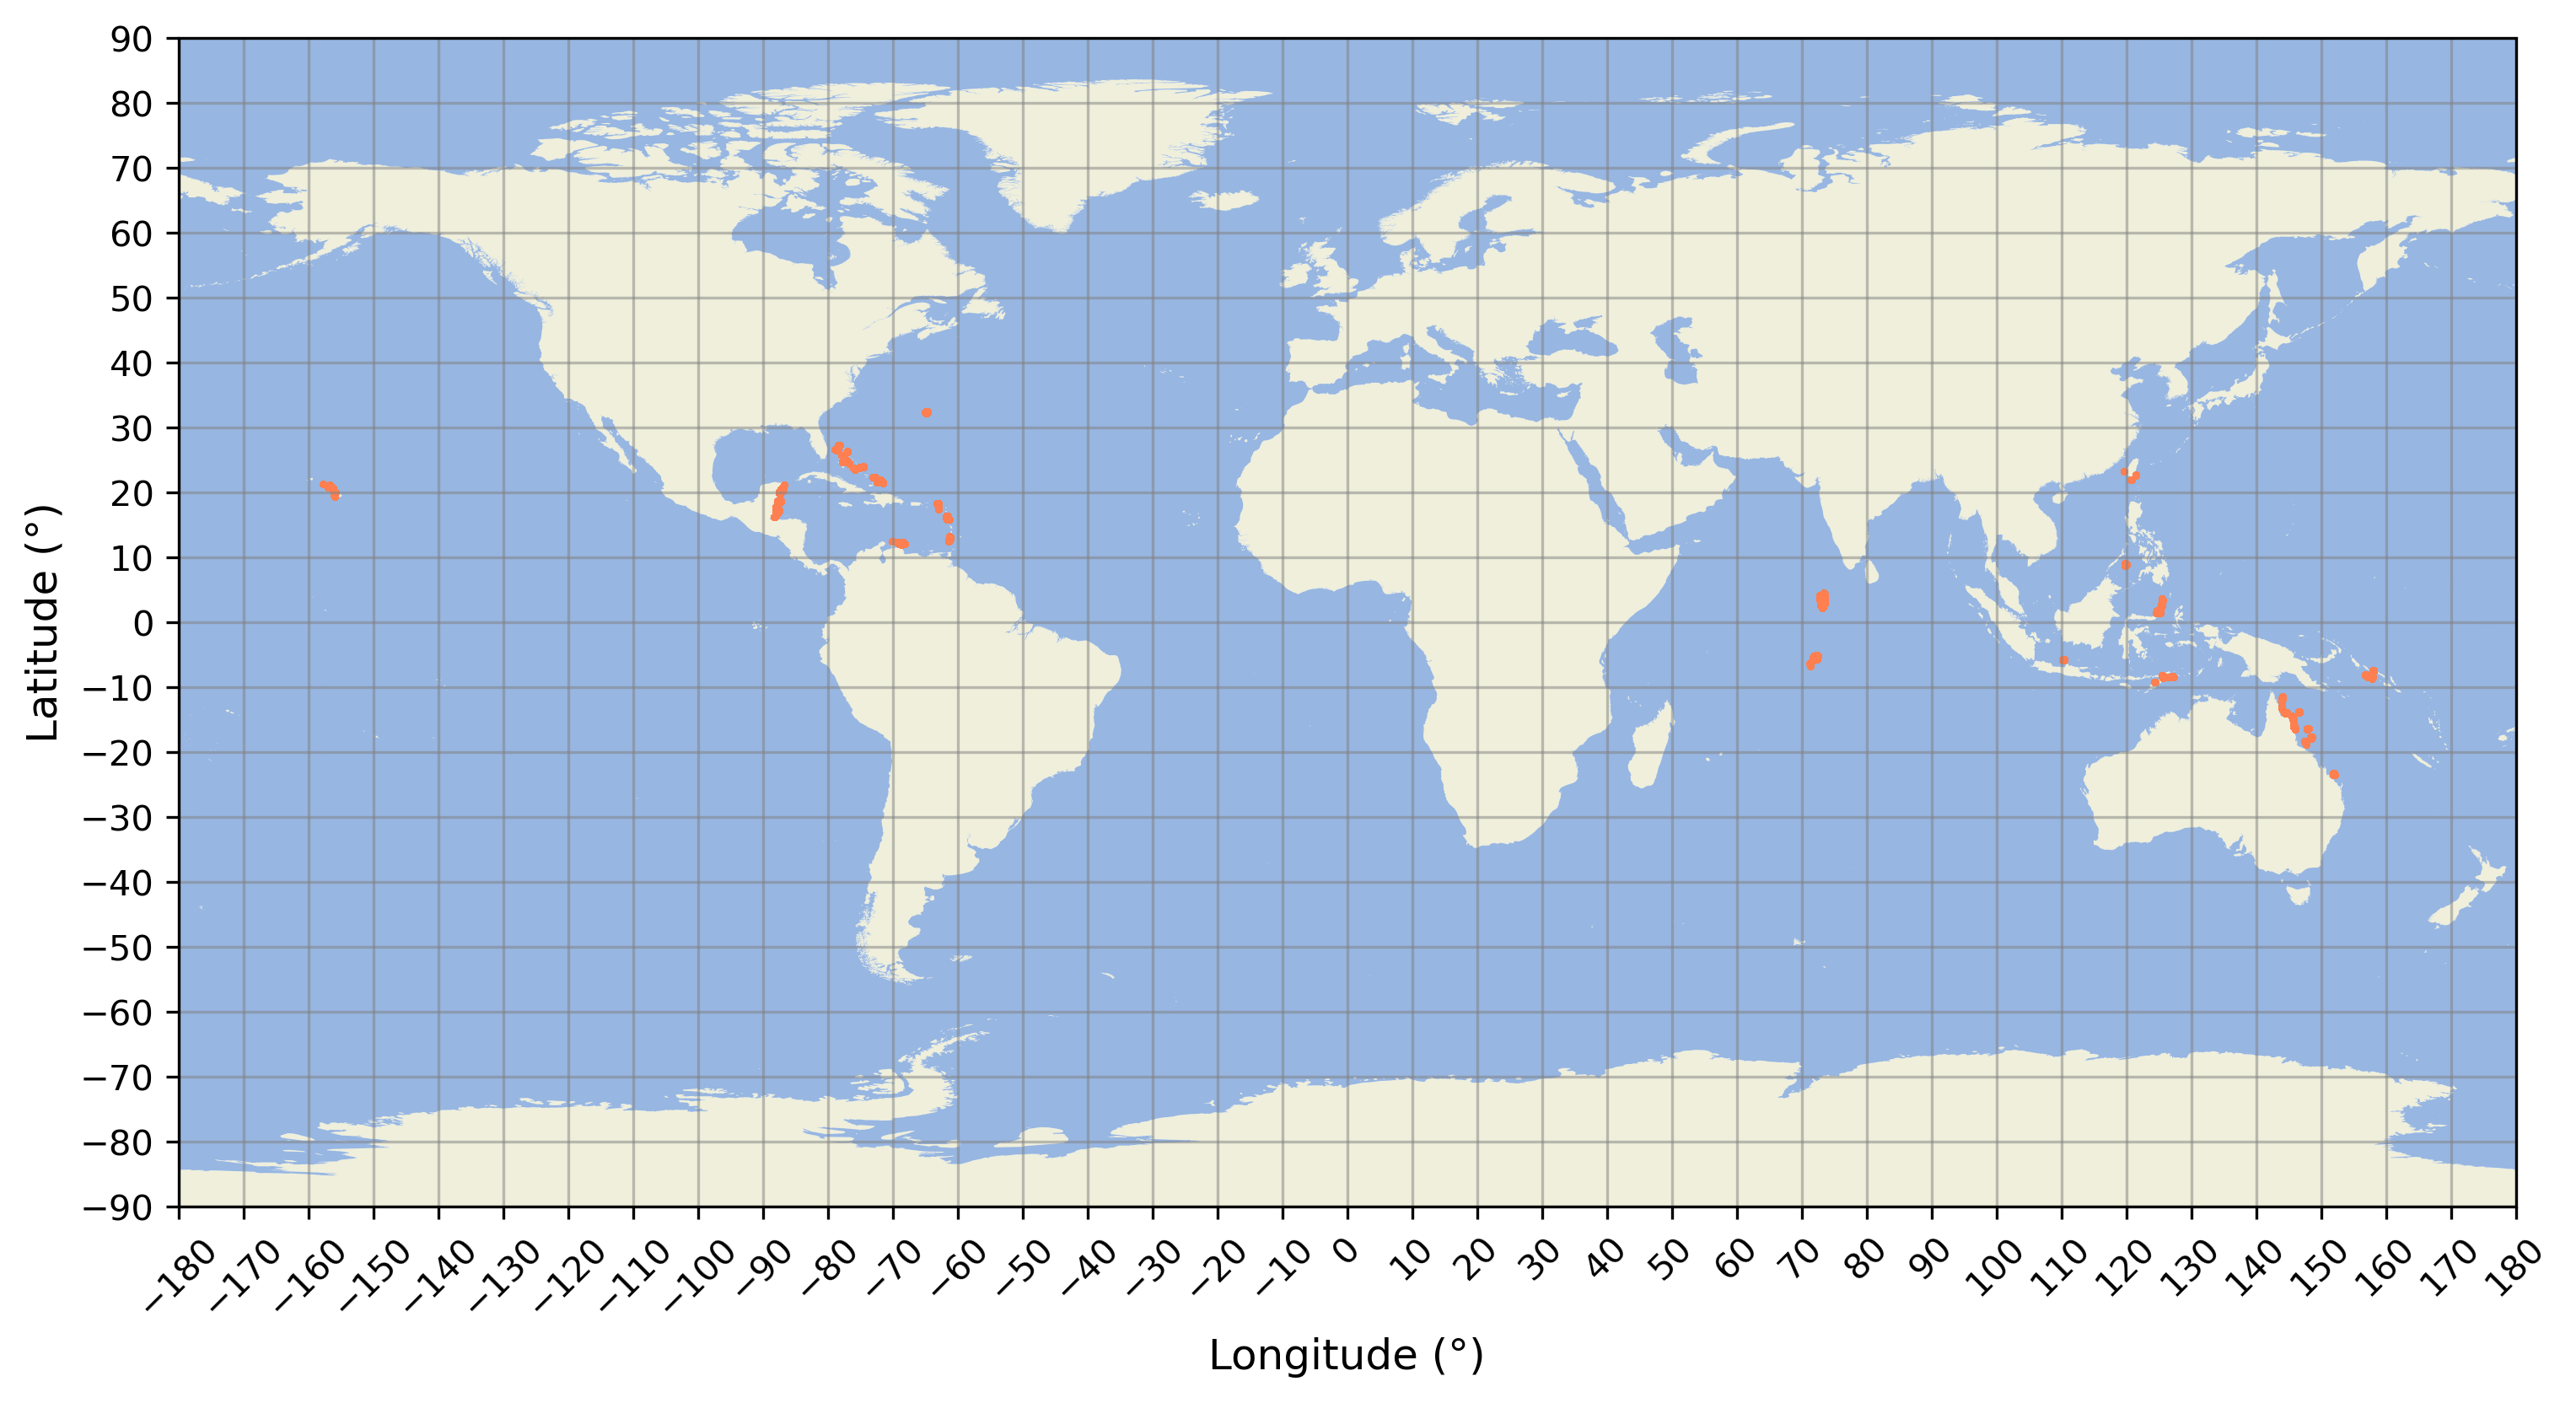

In [24]:
fig = plt.figure(figsize=(12, 6), dpi=300)
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
# Add a global map background
# ax.stock_img()

ax.scatter(all_reef_areas.lng, all_reef_areas.lat, s=1, color='coral', transform=ccrs.PlateCarree())


ax.add_feature(cfeature.LAND.with_scale("10m"))
ax.add_feature(cfeature.OCEAN.with_scale("10m"))

xticks = np.arange(-180, 190, 10)
yticks = np.arange(-90, 100, 10)
ax.set_xticks(xticks, crs=ccrs.PlateCarree())
ax.set_yticks(yticks, crs=ccrs.PlateCarree())
# Set x-label and y-label
ax.set_xlabel(r"Longitude (°)", fontsize=12)
ax.set_ylabel(r"Latitude (°)", fontsize=12)
ax.grid(color='grey', which='both', alpha=0.5)

# ax.set_ylim(18, 23)
# ax.set_xlim(-162, -154)
# Hawaii'i
# ax.set_ylim(19, 20.2)
# ax.set_xlim(-156.1, -155.8)
# Caribbean
# Coral triangle
# ax.set_ylim(-30, 10)
# ax.set_xlim(110, 160)
# # North Sulawesi
# ax.set_ylim(0, 10)
# ax.set_xlim(120, 130)
plt.xticks(rotation=45)

plt.show()

In [11]:
# import folium
# import geopandas as gpd

# # # load data into geopandas dataframe
# # data = gpd.read_file('your_data_file.geojson')

# gpd_all_reef_areas = gpd.GeoDataFrame(all_reef_areas, 
# 	geometry=gpd.points_from_xy(all_reef_areas.lng, all_reef_areas.lat))

# # convert the geometry column to EPSG 4326 (WGS84)
# # data = gpd_all_reef_areas.to_crs(epsg=4326)

# # create a folium map object
# m = folium.Map(location=[gpd_all_reef_areas.centroid.y.mean(), gpd_all_reef_areas.centroid.x.mean()], zoom_start=10)

# # create a folium GeoJson object from the geopandas dataframe
# geojson = folium.GeoJson(gpd_all_reef_areas.__geo_interface__)

# # add the GeoJson object to the map
# geojson.add_to(m)

# # save the map
# # m.save('your_map.html')


In [12]:
# save the map
m.save('your_map.html')

NameError: name 'm' is not defined

In [16]:
import folium
import geopandas as gpd


gpd_all_reef_areas = gpd.GeoDataFrame(all_reef_areas, 
	geometry=gpd.points_from_xy(all_reef_areas.lng, all_reef_areas.lat))


test_map = folium.Map(location=[gpd_all_reef_areas.centroid.y.mean(), gpd_all_reef_areas.centroid.x.mean()], zoom_start=1)
# create a folium GeoJson object from the geopandas dataframe
geojson_lim = folium.GeoJson(gpd_all_reef_areas[:1000].__geo_interface__)
geojson_lim.add_to(test_map)
display(test_map)


In [ ]:
ax.set_ylim(0, 20)
plt.show()